## Sumbit example

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [495]:
# Add your code here
df = pd.read_csv("./train.csv")
df.head(20)   

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838
5,5505,ecom,3060369.0,0.0,1945683,51293,0,NaN,8.586621,0.640110,2022-07-25 16:59:56.675929416
6,4553,porn,99712.0,0.0,0,0,15178,3725,20.786928,0.063572,2023-04-26 05:40:15.012475568
7,1176,ecom,31677060.0,8760379.0,0,924098,0,8519,8.066347,0.080541,2024-02-19 13:16:17.401183524
8,9356,information_source,NaN,30903.0,0,11154,0,260,5.259169,0.283655,2022-01-21 16:24:14.483874704
9,9772,ecom,1695855.0,0.0,1601683,78271,0,1171,9.834370,0.757402,2023-07-10 23:20:54.166954000


In [496]:
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'], errors='coerce')

In [497]:
df.columns.values[0] = 'unknown_feature'

In [498]:
df['source_attractiveness'].mean(), df['source_attractiveness'].median()

(np.float64(0.19199688460706613), np.float64(0.1542557099964202))

<Axes: >

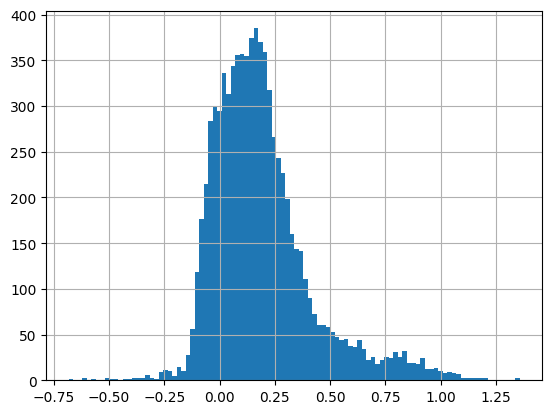

In [499]:
df['source_attractiveness'].hist(bins=100)

In [500]:
def print_shape(data):
    shape = data.shape
    print("Rows:", shape[0])
    print("Cols:", shape[1])

print_shape(df)

Rows: 8000
Cols: 11


In [501]:
train, test = train_test_split(df, test_size=0.2)

In [502]:
print_shape(train)
print_shape(test)

Rows: 6400
Cols: 11
Rows: 1600
Cols: 11


In [505]:
train['time_existence'] = (pd.Timestamp.now() - train['date_of_registration'])/pd.Timedelta(days=365)

In [506]:
train.head(20)

,1,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,time_existence
917,8576,information_source,5813846.0,945589.0,0,388218,0,2885,1.850672,0.189869,2022-12-12 05:35:05.058082784,1.842721
5869,3005,ecom,13024958.0,9046265.0,9412390,0,100219,19103,1.975604,0.735676,2023-10-24 04:47:25.731020956,0.977058
2174,1265,ecom,2677178.0,0.0,155484,33237,10342,NaN,0.051160,0.183523,2022-08-23 18:57:53.872845344,2.145303
6262,1431,porn,NaN,56389.0,0,0,0,1529,-1.000000,0.138346,2023-12-04 03:52:13.282140920,0.864835
3948,991,information_source,6769591.0,0.0,0,0,619841,123517,4.166370,-0.181030,2020-06-24 03:55:20.135506272,4.311404
1732,7280,information_source,3848049.0,407230.0,0,652497,101222,25265,8.839921,0.158181,2020-06-13 21:51:30.314119232,4.339493
5373,8877,news,850074.0,0.0,0,152573,0,1235,2.560208,0.267636,2021-01-08 03:28:46.967782912,3.768989
6306,7416,porn,33745.0,3438.0,0,0,7453,707,36.239485,0.313946,2014-05-25 15:07:54.151431360,10.397796
1275,6877,social,374621.0,97124.0,0,6623,1287,38,47.340892,0.143031,2023-11-05 21:21:50.527214552,0.942290
5567,1194,porn,318614.0,71718.0,0,50338,52846,11860,44.714372,-0.016154,2023-05-24 01:01:18.421444656,1.396667


In [507]:
train['average_dwelltime'] = train['average_dwelltime'].apply(lambda x: np.nan if x < 0 else x)

In [508]:
train.replace('-', np.nan, inplace=True)
train['complaints_count'] = train['complaints_count'].astype(float)

In [509]:
train.head(20)

,1,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,time_existence
917,8576,information_source,5813846.0,945589.0,0,388218,0,2885.0,1.850672,0.189869,2022-12-12 05:35:05.058082784,1.842721
5869,3005,ecom,13024958.0,9046265.0,9412390,0,100219,19103.0,1.975604,0.735676,2023-10-24 04:47:25.731020956,0.977058
2174,1265,ecom,2677178.0,0.0,155484,33237,10342,NaN,0.051160,0.183523,2022-08-23 18:57:53.872845344,2.145303
6262,1431,porn,NaN,56389.0,0,0,0,1529.0,NaN,0.138346,2023-12-04 03:52:13.282140920,0.864835
3948,991,information_source,6769591.0,0.0,0,0,619841,123517.0,4.166370,-0.181030,2020-06-24 03:55:20.135506272,4.311404
1732,7280,information_source,3848049.0,407230.0,0,652497,101222,25265.0,8.839921,0.158181,2020-06-13 21:51:30.314119232,4.339493
5373,8877,news,850074.0,0.0,0,152573,0,1235.0,2.560208,0.267636,2021-01-08 03:28:46.967782912,3.768989
6306,7416,porn,33745.0,3438.0,0,0,7453,707.0,36.239485,0.313946,2014-05-25 15:07:54.151431360,10.397796
1275,6877,social,374621.0,97124.0,0,6623,1287,38.0,47.340892,0.143031,2023-11-05 21:21:50.527214552,0.942290
5567,1194,porn,318614.0,71718.0,0,50338,52846,11860.0,44.714372,-0.016154,2023-05-24 01:01:18.421444656,1.396667


In [510]:
train.fillna(train.select_dtypes(include='number').mean(), inplace=True)

In [511]:
train.head(20)

,1,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,time_existence
917,8576,information_source,5.813846e+06,945589.0,0,388218,0,2885.000000,1.850672,0.189869,2022-12-12 05:35:05.058082784,1.842721
5869,3005,ecom,1.302496e+07,9046265.0,9412390,0,100219,19103.000000,1.975604,0.735676,2023-10-24 04:47:25.731020956,0.977058
2174,1265,ecom,2.677178e+06,0.0,155484,33237,10342,6232.861779,0.051160,0.183523,2022-08-23 18:57:53.872845344,2.145303
6262,1431,porn,2.745396e+06,56389.0,0,0,0,1529.000000,7.448643,0.138346,2023-12-04 03:52:13.282140920,0.864835
3948,991,information_source,6.769591e+06,0.0,0,0,619841,123517.000000,4.166370,-0.181030,2020-06-24 03:55:20.135506272,4.311404
1732,7280,information_source,3.848049e+06,407230.0,0,652497,101222,25265.000000,8.839921,0.158181,2020-06-13 21:51:30.314119232,4.339493
5373,8877,news,8.500740e+05,0.0,0,152573,0,1235.000000,2.560208,0.267636,2021-01-08 03:28:46.967782912,3.768989
6306,7416,porn,3.374500e+04,3438.0,0,0,7453,707.000000,36.239485,0.313946,2014-05-25 15:07:54.151431360,10.397796
1275,6877,social,3.746210e+05,97124.0,0,6623,1287,38.000000,47.340892,0.143031,2023-11-05 21:21:50.527214552,0.942290
5567,1194,porn,3.186140e+05,71718.0,0,50338,52846,11860.000000,44.714372,-0.016154,2023-05-24 01:01:18.421444656,1.396667


In [512]:
categorial_features = ['category'] # категориальные
real_features = ['1','clicks', 'likes', 'buys','4xx_errors', '5xx_errors', 'complaints_count', 'average_dwelltime','time_existence'] # вещественные
target_features = 'source_attractiveness' # целевой

In [513]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for hue in categorial_features:
    g = sns.PairGrid(train[[*(real_features + [target_features]), hue]], hue=hue, diag_sharey=False, height=3)
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
    g.add_legend()
    

In [514]:
encoder = OneHotEncoder(drop='first', sparse_output = False)
train_cat = encoder.fit_transform(train[categorial_features])
train_cat   

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [515]:
encoder.categories_

[array(['ecom', 'information_source', 'news', 'porn', 'social'],
       dtype=object)]

In [516]:
X_train = np.hstack([train[real_features], train_cat])
print_shape(X_train)

Rows: 6400
Cols: 13


In [517]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_features])

LinearRegression()

In [518]:
model.coef_

array([-5.91922513e-07, -1.50290576e-08,  2.39227848e-08,  4.59040490e-08,
        5.38093099e-08, -5.64351185e-07,  2.45401119e-07,  1.89770877e-03,
        5.20571001e-02, -1.98102020e-01, -2.24219259e-01, -2.79030343e-01,
       -2.51638933e-01])

In [519]:
model.intercept_

np.float64(0.23098392615464133)

In [520]:
test['time_existence'] = (pd.Timestamp.now() - test['date_of_registration'])/pd.Timedelta(days=365)
test['average_dwelltime'] = test['average_dwelltime'].apply(lambda x: np.nan if x < 0 else x)
test.replace('-', np.nan, inplace=True)
test['complaints_count'] = test['complaints_count'].astype(float)
test.fillna(test.select_dtypes(include='number').mean(), inplace=True)
test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_cat])

In [521]:
test_preds = model.predict(X_test)

In [531]:
MSE = ((test_preds - test[target_features]) ** 2).mean()
MSE

np.float64(0.01619764899437754)

## Final model submit function

Принимает на вход путь к набору данных в формате `.csv`

На выходе получается файл с предиктами в формате `.csv`

Пример содержания:
```
0.432
0.412
0.312
```

Реализация модели - между ними

In [5]:
data_path = "./test.csv"
def predict(data_path):
    data = pd.read_csv(data_path)
    data['date_of_registration'] = pd.to_datetime(data['date_of_registration'], errors='coerce')
    data.columns.values[0] = 'unknown_feature'
    data['time_existence'] = (pd.Timestamp.now() - data['date_of_registration'])/pd.Timedelta(days=365)
    data['average_dwelltime'] = data['average_dwelltime'].apply(lambda x: np.nan if x < 0 else x)
    data.replace('-', np.nan, inplace=True)
    data['complaints_count'] = data['complaints_count'].astype(float)
    data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
    test_cat = encoder.transform(data[categorial_features])
    X_test = np.hstack([data[real_features], test_cat])
    predicts = model.predict(X_test)
    data = {"source_attractiveness": predicts}
    submit = pd.DataFrame(data)
    submit.to_csv('submission.csv', index_label="ID")


SyntaxError: invalid syntax (3716318233.py, line 4)